In [1]:
import numpy as np
from matplotlib import pyplot as plt
from daphne import daphne
from evaluation_based_sampling import evaluate_program
from graph_based_sampling import sample_from_joint

In [2]:
def load_ast(num):
    return daphne(['desugar', '-i', '../a2/programs/{}.daphne'.format(num)])

def load_graph(num):
    return daphne(['graph', '-i', '../a2/programs/{}.daphne'.format(num)])

In [3]:
%matplotlib inline

# Evaluation-based Sampling #
## Program 1 ##

Mean of mu: 0.984



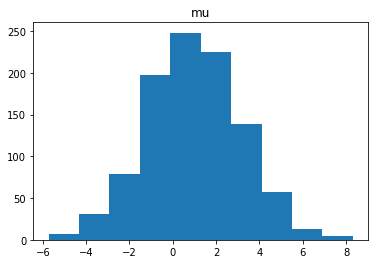

In [48]:
ast = load_ast(1)
samples = []
for i in range(1000):
    samples.append(evaluate_program(ast).item())
print("Mean of mu: {:.3f}\n".format(np.mean(samples)))
plt.hist(samples, bins=10)
plt.title("mu")
plt.show()

## Program 2

Mean of slope: 0.041
Mean of bias: -0.169



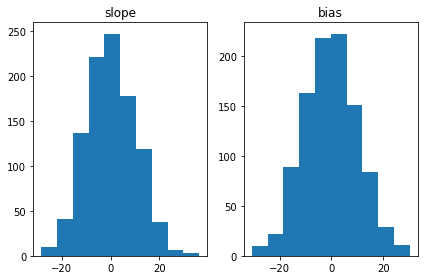

In [21]:
ast = load_ast(2)
samples = []
for i in range(1000):
    samples.append(evaluate_program(ast).numpy().tolist())
samples = np.asarray(samples)

print("Mean of slope: {:.3f}".format(np.mean(samples[:, 0])))
print("Mean of bias: {:.3f}\n".format(np.mean(samples[:, 1])))

plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=10)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=10)
plt.title("bias")
plt.tight_layout()
plt.show()


## Program 3

Mean of z_i's:
 1.01 1.408 1.495 1.49 1.456 1.461 1.5 1.509 1.493 1.448 1.497 1.533 1.48 1.515 1.459 1.427 1.482


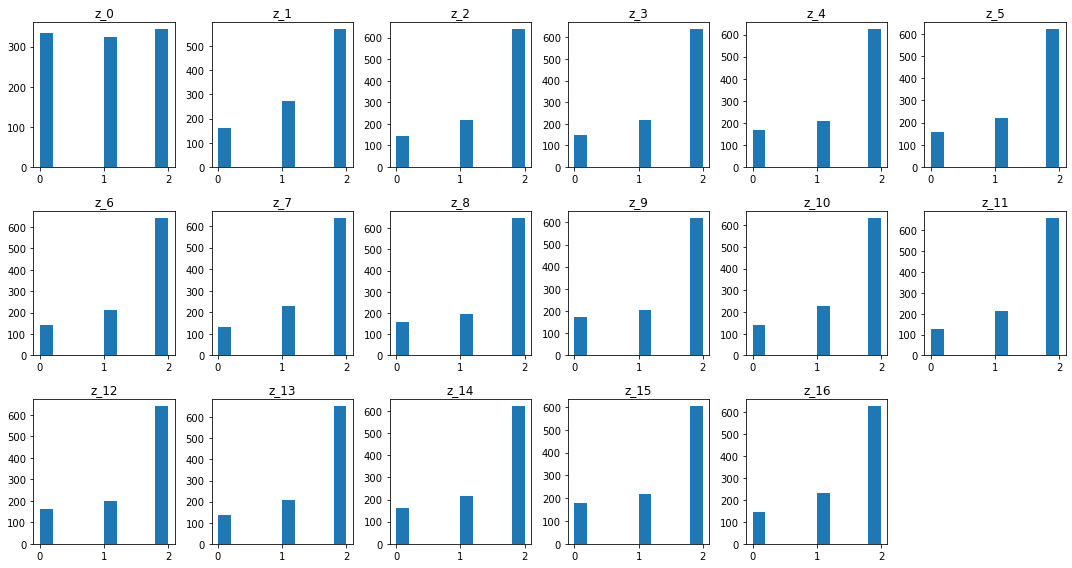

In [46]:
ast = load_ast(3)
samples = []
for i in range(1000):
    samples.append(evaluate_program(ast).numpy().tolist())
samples = np.asarray(samples)

print("Mean of z_i's:\n", *np.mean(samples, axis=0, keepdims=False).tolist())

plt.figure(figsize=(15, 8))
for i in range(17):
    plt.subplot(3, 6, i+1)
    plt.hist(samples[:, i])
    plt.title("z_{}".format(i))
plt.tight_layout()
plt.show()

## Program 4

In [25]:
ast = load_ast(4)
samples = {'W0': [], 'b0': [], 'W1': [], 'b1': []}
for i in range(1000):
    ret = evaluate_program(ast)
    samples['W0'].append(ret[0].numpy().reshape(10))
    samples['b0'].append(ret[1].numpy().reshape(10))
    samples['W1'].append(ret[2].numpy())
    samples['b1'].append(ret[3].numpy().reshape(10))
samples['W0'] = np.asarray(samples['W0'])
samples['b0'] = np.asarray(samples['b0'])
samples['W1'] = np.asarray(samples['W1'])
samples['b1'] = np.asarray(samples['b1'])

In [26]:
np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.3f}".format})
print("Mean of W0:\n", np.mean(samples['W0'], axis=0, keepdims=False))
print("Mean of b0:\n", np.mean(samples['b0'], axis=0, keepdims=False))
print("Mean of W1:\n", np.mean(samples['W1'], axis=0, keepdims=False))
print("Mean of b1:\n", np.mean(samples['b1'], axis=0, keepdims=False))

Mean of W0:
 [-0.012 -0.020 -0.031 0.060 0.060 0.008 -0.022 -0.036 -0.003 -0.005]
Mean of b0:
 [0.074 0.035 0.035 -0.003 0.026 0.019 0.037 -0.043 0.059 -0.020]
Mean of W1:
 [[0.059 -0.041 -0.057 -0.034 0.061 -0.024 0.044 0.004 -0.063 -0.003]
 [-0.009 -0.018 0.011 -0.019 0.039 -0.013 0.021 -0.012 0.062 0.006]
 [0.017 -0.033 0.001 0.011 0.009 0.001 -0.030 -0.042 -0.045 0.058]
 [0.041 0.034 -0.070 -0.024 -0.063 -0.066 0.008 0.056 0.012 0.029]
 [-0.027 0.003 0.005 -0.015 -0.018 -0.005 0.032 -0.008 -0.019 0.008]
 [0.058 -0.047 0.019 -0.019 0.002 0.023 0.011 -0.032 -0.037 0.046]
 [0.005 -0.014 -0.007 0.055 0.055 -0.067 0.032 -0.050 -0.045 -0.016]
 [0.013 -0.042 0.057 0.025 -0.006 0.022 -0.009 -0.001 -0.060 0.019]
 [-0.005 0.024 -0.050 0.019 -0.007 0.032 0.015 0.010 0.009 0.058]
 [-0.018 -0.053 -0.000 -0.002 0.004 0.025 0.027 0.028 0.033 0.017]]
Mean of b1:
 [-0.047 0.014 0.030 0.051 -0.020 -0.031 -0.007 0.015 -0.072 -0.028]


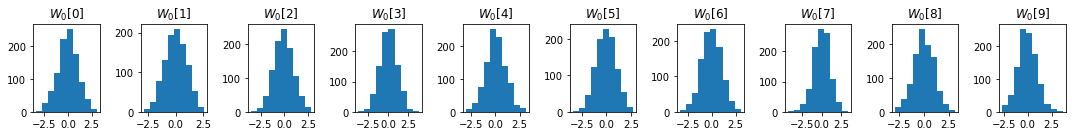

In [33]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['W0'][:, i], bins=10)
    plt.title(r"$W_0 [{}]$".format(i))
plt.tight_layout()
plt.show()

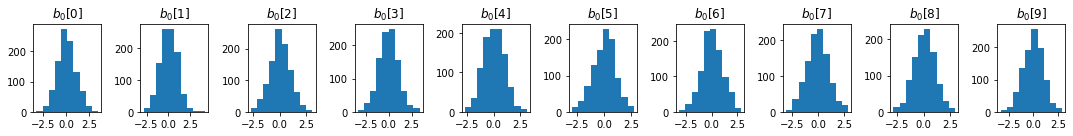

In [34]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['b0'][:, i], bins=10)
    plt.title(r"$b_0 [{}]$".format(i))
plt.tight_layout()
plt.show()

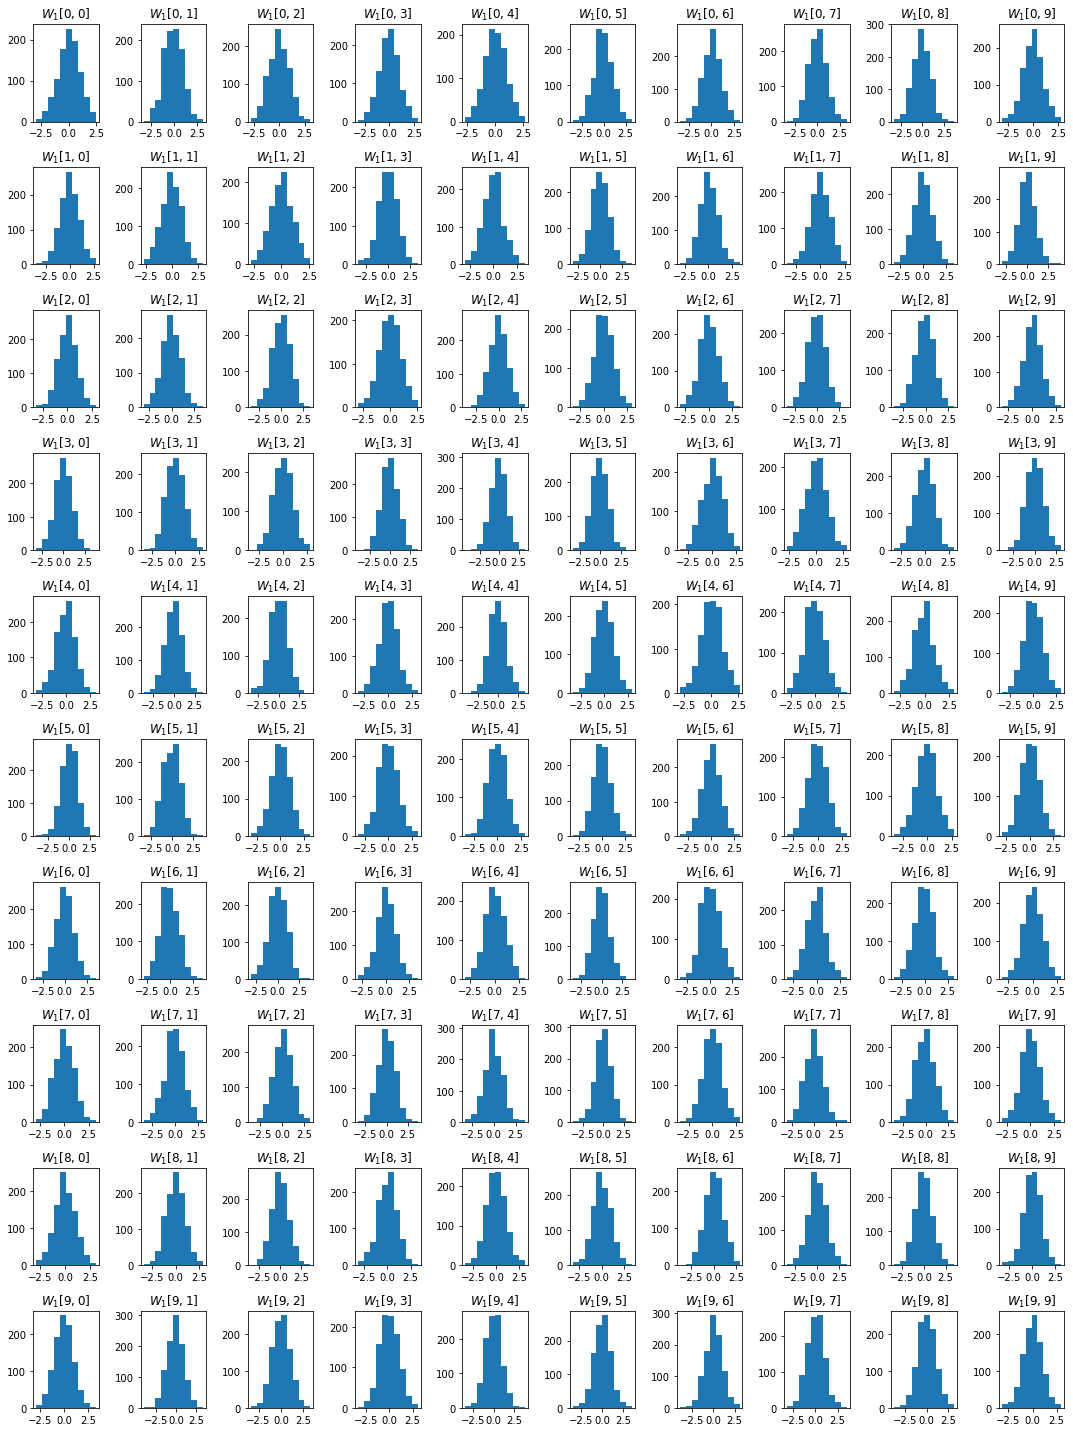

In [35]:
plt.figure(figsize=(15,20))
for i in range(10):
    for j in range(10):
        plt.subplot(10,10,10*i+j+1)
        plt.hist(samples['W1'][:, i, j])
        plt.title(r"$W_1[{}, {}]$".format(i, j))
plt.tight_layout()
plt.show()

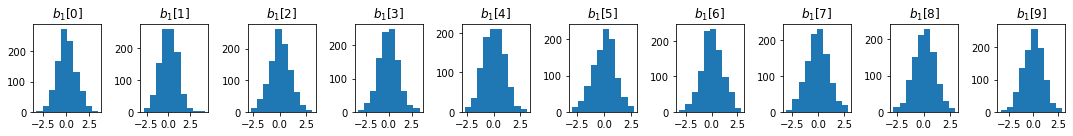

In [36]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['b0'][:, i], bins=10)
    plt.title(r"$b_1 [{}]$".format(i))
plt.tight_layout()
plt.show()

# Graph-based Sampling #
## Program 1 ##

Mean of mu: 0.990



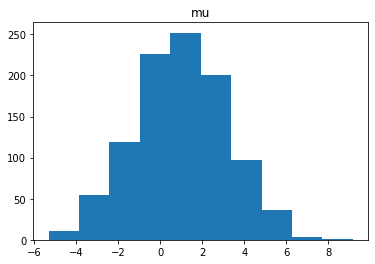

In [49]:
graph = load_graph(1)
samples = []
for i in range(1000):
    samples.append(sample_from_joint(graph).item())
print("Mean of mu: {:.3f}\n".format(np.mean(samples)))
plt.hist(samples, bins=10)
plt.title("mu")
plt.show()

# Program 2 #

Mean of slope: 0.131
Mean of bias: -0.285



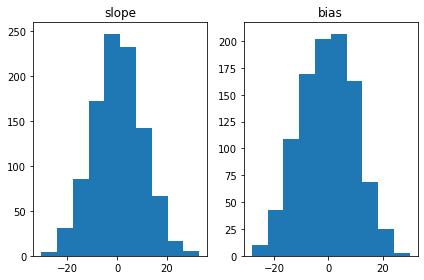

In [51]:
graph = load_graph(2)
samples = []
for i in range(1000):
    samples.append(sample_from_joint(graph).numpy().tolist())
samples = np.asarray(samples)

print("Mean of slope: {:.3f}".format(np.mean(samples[:, 0])))
print("Mean of bias: {:.3f}\n".format(np.mean(samples[:, 1])))

plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=10)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=10)
plt.title("bias")
plt.tight_layout()
plt.show()

# Program 3 #

Mean of z_i's:
 1.03 1.432 1.506 1.476 1.518 1.517 1.485 1.477 1.488 1.447 1.459 1.495 1.478 1.465 1.501 1.492 1.443


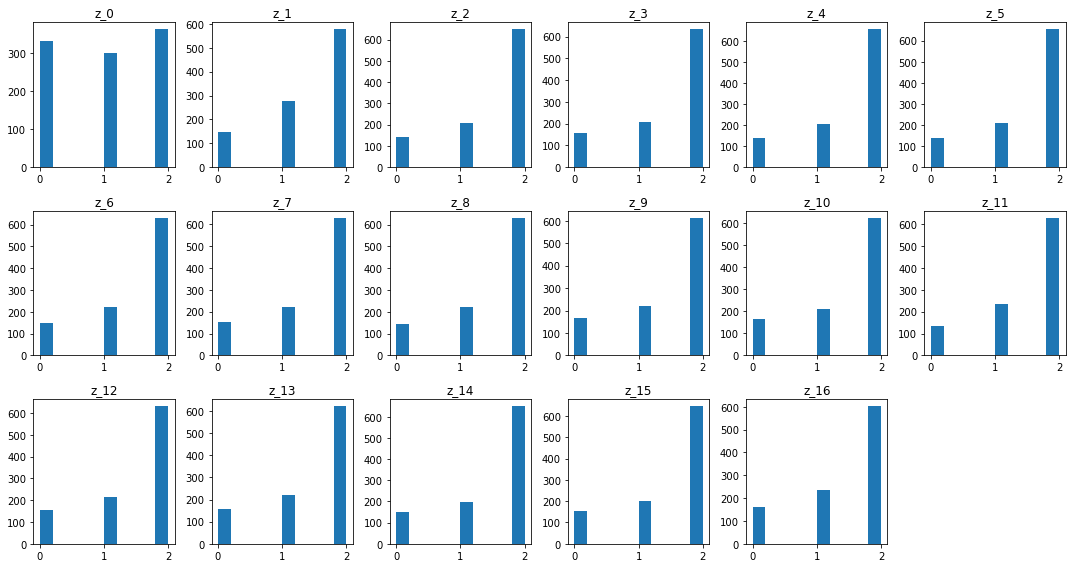

In [53]:
graph = load_graph(3)
samples = []
for i in range(1000):
    samples.append(sample_from_joint(graph).numpy().tolist())
samples = np.asarray(samples)

print("Mean of z_i's:\n", *np.mean(samples, axis=0, keepdims=False).tolist())

plt.figure(figsize=(15, 8))
for i in range(17):
    plt.subplot(3, 6, i+1)
    plt.hist(samples[:, i])
    plt.title("z_{}".format(i))
plt.tight_layout()
plt.show()

# Program 4 # 

In [54]:
graph = load_graph(4)
samples = {'W0': [], 'b0': [], 'W1': [], 'b1': []}
for i in range(1000):
    ret = sample_from_joint(graph)
    samples['W0'].append(ret[0].numpy().reshape(10))
    samples['b0'].append(ret[1].numpy().reshape(10))
    samples['W1'].append(ret[2].numpy())
    samples['b1'].append(ret[3].numpy().reshape(10))
samples['W0'] = np.asarray(samples['W0'])
samples['b0'] = np.asarray(samples['b0'])
samples['W1'] = np.asarray(samples['W1'])
samples['b1'] = np.asarray(samples['b1'])

np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.3f}".format})
print("Mean of W0:\n", np.mean(samples['W0'], axis=0, keepdims=False))
print("Mean of b0:\n", np.mean(samples['b0'], axis=0, keepdims=False))
print("Mean of W1:\n", np.mean(samples['W1'], axis=0, keepdims=False))
print("Mean of b1:\n", np.mean(samples['b1'], axis=0, keepdims=False))

Mean of W0:
 [-0.025 0.001 -0.037 0.010 -0.008 -0.010 0.002 0.072 0.001 -0.022]
Mean of b0:
 [0.006 -0.038 -0.016 -0.023 -0.004 0.010 0.007 -0.005 -0.012 0.008]
Mean of W1:
 [[-0.017 -0.010 -0.002 -0.029 -0.045 -0.067 0.029 -0.009 0.008 0.034]
 [-0.042 0.012 -0.021 -0.017 -0.078 -0.010 -0.014 -0.047 0.015 -0.033]
 [-0.025 -0.005 -0.066 0.039 -0.033 -0.004 -0.018 -0.009 0.055 0.005]
 [0.055 -0.032 0.082 0.039 0.019 0.033 -0.026 0.004 0.044 -0.023]
 [-0.027 0.013 0.022 -0.032 0.006 -0.023 0.002 -0.004 -0.081 0.009]
 [0.045 -0.036 0.022 -0.006 0.025 0.008 -0.013 0.035 -0.024 -0.035]
 [-0.018 -0.034 -0.014 -0.018 0.007 -0.024 -0.043 -0.004 0.016 -0.019]
 [-0.085 0.052 -0.046 0.049 0.017 0.042 -0.026 0.022 -0.008 0.029]
 [0.052 -0.012 0.034 -0.026 -0.031 -0.024 0.021 -0.053 0.014 -0.008]
 [0.008 0.040 -0.009 -0.043 -0.028 -0.028 -0.034 0.027 0.015 -0.011]]
Mean of b1:
 [-0.030 0.007 -0.023 -0.028 0.022 -0.079 0.009 0.015 -0.018 0.039]


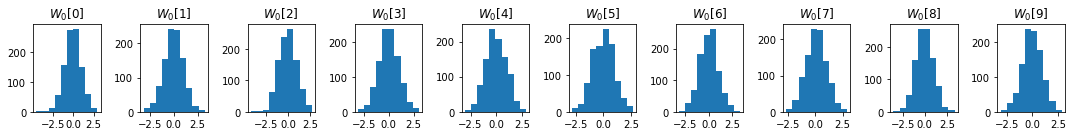

In [55]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['W0'][:, i], bins=10)
    plt.title(r"$W_0 [{}]$".format(i))
plt.tight_layout()
plt.show()

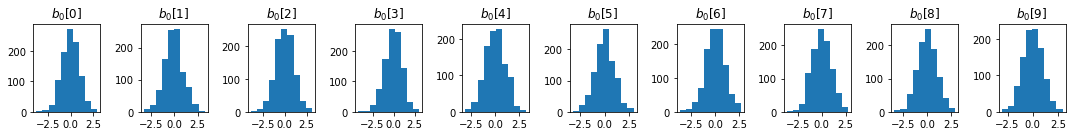

In [56]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['b0'][:, i], bins=10)
    plt.title(r"$b_0 [{}]$".format(i))
plt.tight_layout()
plt.show()

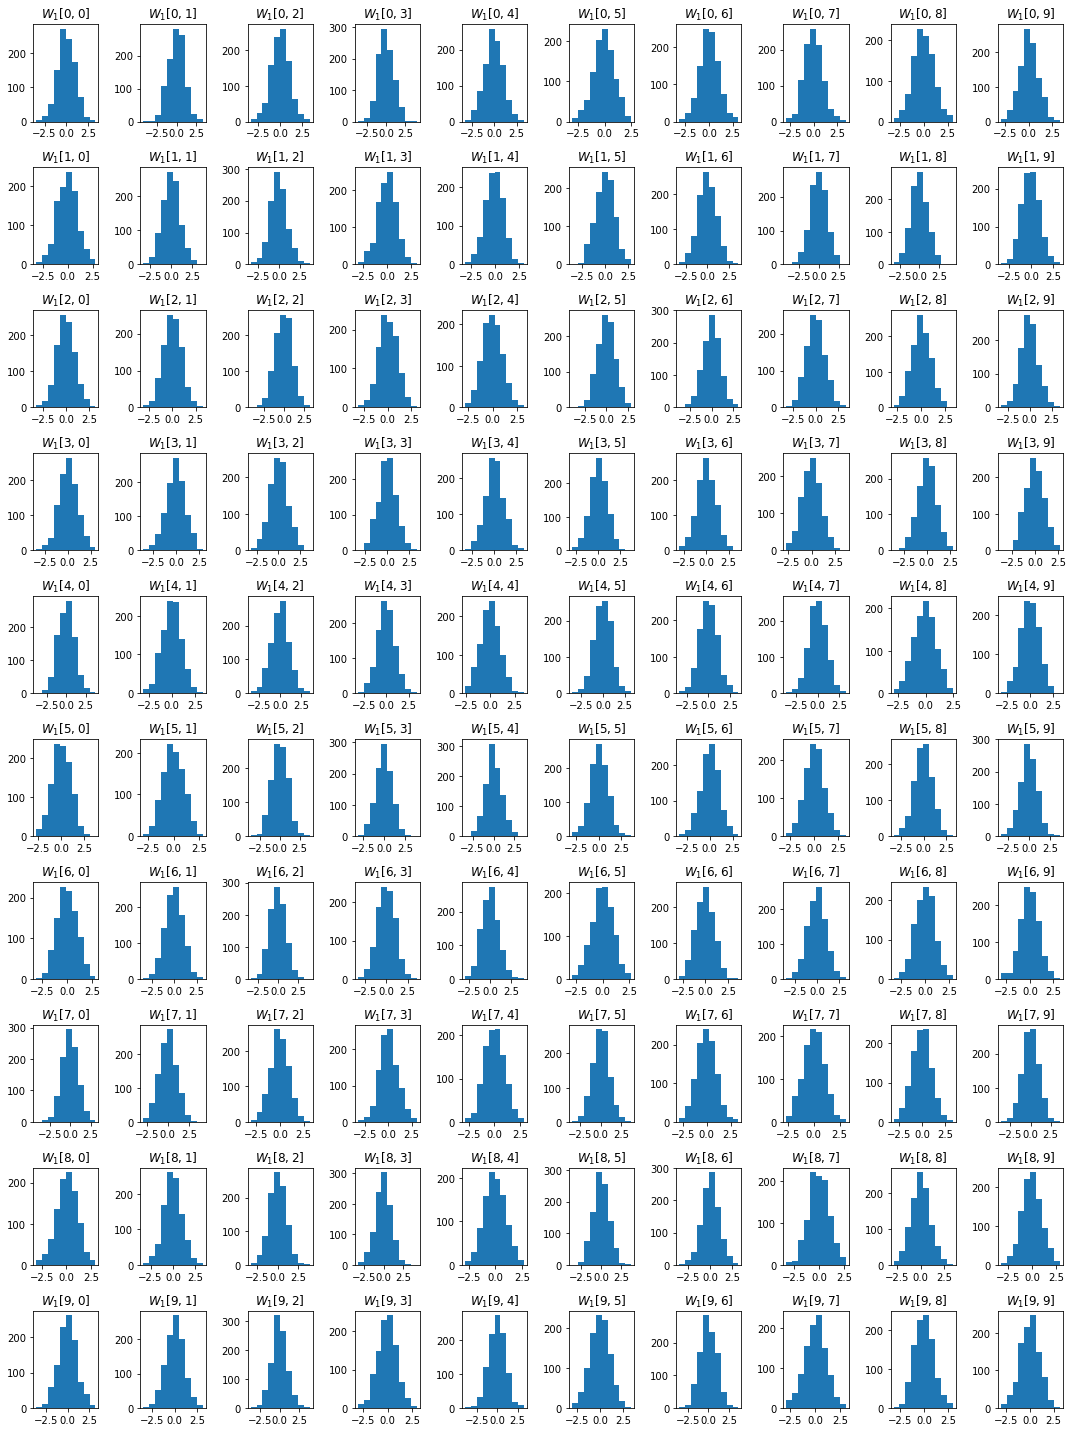

In [57]:
plt.figure(figsize=(15,20))
for i in range(10):
    for j in range(10):
        plt.subplot(10,10,10*i+j+1)
        plt.hist(samples['W1'][:, i, j])
        plt.title(r"$W_1[{}, {}]$".format(i, j))
plt.tight_layout()
plt.show()

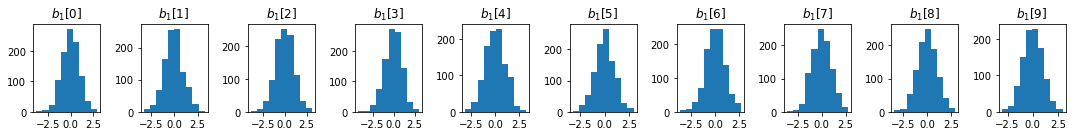

In [58]:
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(samples['b0'][:, i], bins=10)
    plt.title(r"$b_1 [{}]$".format(i))
plt.tight_layout()
plt.show()